In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

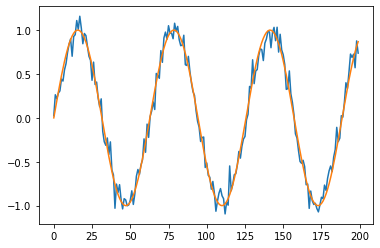

In [8]:
#data
noise = np.random.randn(200)*0.1
series = np.sin(0.1*np.arange(200)) + noise
clean_series = np.sin(0.1*np.arange(200))
plt.plot(series)
plt.plot(clean_series)
plt.show()

In [16]:
T = 10
D = 1 
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    y = series[t+T]
    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1,T,1) #
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)


(190, 10, 1) (190,)


In [20]:
i = Input(shape=(T, 1))
x = SimpleRNN(15)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 13ms/sample - loss: 0.4722 - val_loss: 0.4143
Epoch 2/80
95/95 [==============================] - 0s 663us/sample - loss: 0.3953 - val_loss: 0.3542
Epoch 3/80
95/95 [==============================] - 0s 598us/sample - loss: 0.3418 - val_loss: 0.3064
Epoch 4/80
95/95 [==============================] - 0s 558us/sample - loss: 0.2952 - val_loss: 0.2691
Epoch 5/80
95/95 [==============================] - 0s 580us/sample - loss: 0.2626 - val_loss: 0.2384
Epoch 6/80
95/95 [==============================] - 0s 559us/sample - loss: 0.2354 - val_loss: 0.2119
Epoch 7/80
95/95 [==============================] - 0s 579us/sample - loss: 0.2088 - val_loss: 0.1883
Epoch 8/80
95/95 [==============================] - 0s 568us/sample - loss: 0.1846 - val_loss: 0.1661
Epoch 9/80
95/95 [==============================] - 0s 573us/sample - loss: 0.1614 - val_loss: 0.1454
Epoch 10/80
95/95 [====================

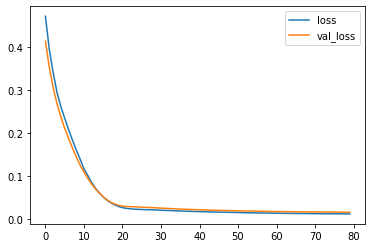

In [21]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

In [24]:
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2

while len(validation_prediction) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i+=1
    
    validation_prediction.append(p)
    

#### RNN shapes
